# NUS Praktikum 4



## Aufgabe 1
### b)

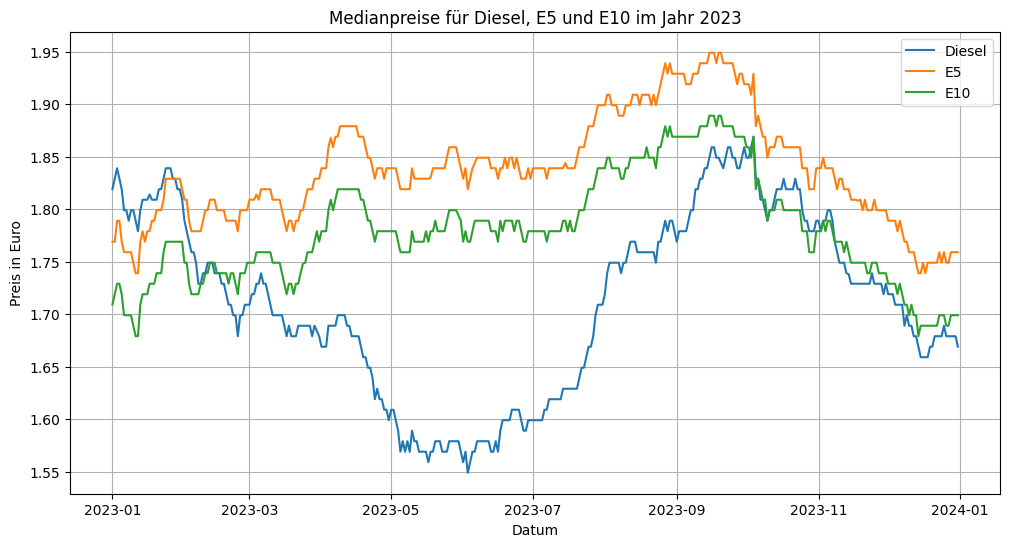

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Funktion zum Einlesen und Verarbeiten einer einzelnen Datei
def process_file(file_path):
    df = pd.read_csv(file_path)
    # Nur Einträge größer als Null berücksichtigen
    df = df[(df['diesel'] > 0) & (df['e5'] > 0) & (df['e10'] > 0)]
    # Median für diesel, e5 und e10 berechnen
    median_prices = df[['diesel', 'e5', 'e10']].median()
    # Berechnung des arithmetischen Mittels und der Standardabweichung für diesel, e5 und e10
    means = df[['diesel', 'e5', 'e10']].mean()
    std_devs = df[['diesel', 'e5', 'e10']].std()
    # Berechnung der Coefficient of Variation (CV)
    cv = std_devs / means
    return df, median_prices, cv

# Pfad zum Verzeichnis mit den Dateien
base_path = '2023'

# Listen zum Speichern der Ergebnisse
dates = []
diesel_medians = []
e5_medians = []
e10_medians = []
cvs = []
all_data = {}

# Durch das ganze Jahr iterieren
for month in range(1, 13):
    for day in range(1, 32):
        try:
            # Datum für den aktuellen Tag
            date_str = f'2023-{month:02d}-{day:02d}'
            # Pfad zur Datei für den aktuellen Tag
            file_path = os.path.join(base_path, f'{month:02d}', f'{date_str}-prices.csv')
            # Überprüfen, ob die Datei existiert
            if os.path.exists(file_path):
                # Datei einlesen und Medianpreise sowie CV berechnen
                df, medians, cv = process_file(file_path)
                # Ergebnisse speichern
                dates.append(date_str)
                diesel_medians.append(medians['diesel'])
                e5_medians.append(medians['e5'])
                e10_medians.append(medians['e10'])
                cvs.append(cv)
                all_data[date_str] = df
        except Exception as e:
            print(f'Fehler beim Verarbeiten der Datei {file_path}: {e}')

# Ergebnisse in ein DataFrame umwandeln
median_df = pd.DataFrame({
    'date': pd.to_datetime(dates),
    'diesel': diesel_medians,
    'e5': e5_medians,
    'e10': e10_medians
})
cv_df = pd.DataFrame(cvs, index=pd.to_datetime(dates))

# Plotten der Medianpreise
plt.figure(figsize=(12, 6))
plt.plot(median_df['date'], median_df['diesel'], label='Diesel')
plt.plot(median_df['date'], median_df['e5'], label='E5')
plt.plot(median_df['date'], median_df['e10'], label='E10')
plt.title('Medianpreise für Diesel, E5 und E10 im Jahr 2023')
plt.xlabel('Datum')
plt.ylabel('Preis in Euro')
plt.legend()
plt.grid(True)
plt.show()





## Aufgabe 1
### c)

Tag mit der größten Schwankung: 2023-02-06 00:00:00
Tag mit der kleinsten Schwankung: 2023-09-16 00:00:00


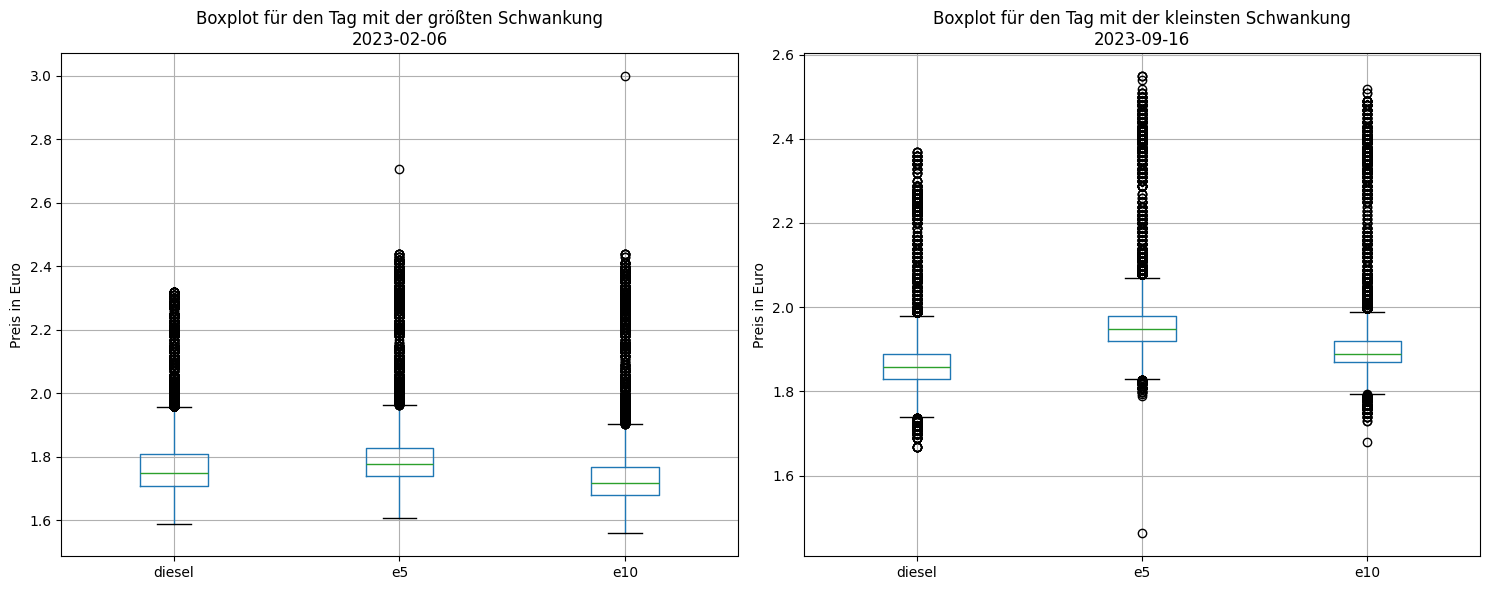

In [2]:
# Tag mit der größten und kleinsten Schwankung identifizieren
max_cv_date = cv_df.mean(axis=1).idxmax()
min_cv_date = cv_df.mean(axis=1).idxmin()

print(f'Tag mit der größten Schwankung: {max_cv_date}')
print(f'Tag mit der kleinsten Schwankung: {min_cv_date}')

# Boxplots für die Tage mit der größten und kleinsten Schwankung erstellen
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

all_data[max_cv_date.strftime('%Y-%m-%d')].boxplot(column=['diesel', 'e5', 'e10'], ax=axes[0])
axes[0].set_title(f'Boxplot für den Tag mit der größten Schwankung\n{max_cv_date.strftime("%Y-%m-%d")}')
axes[0].set_ylabel('Preis in Euro')

all_data[min_cv_date.strftime('%Y-%m-%d')].boxplot(column=['diesel', 'e5', 'e10'], ax=axes[1])
axes[1].set_title(f'Boxplot für den Tag mit der kleinsten Schwankung\n{min_cv_date.strftime("%Y-%m-%d")}')
axes[1].set_ylabel('Preis in Euro')

plt.tight_layout()
plt.show()

## Aufgabe 2
### a)

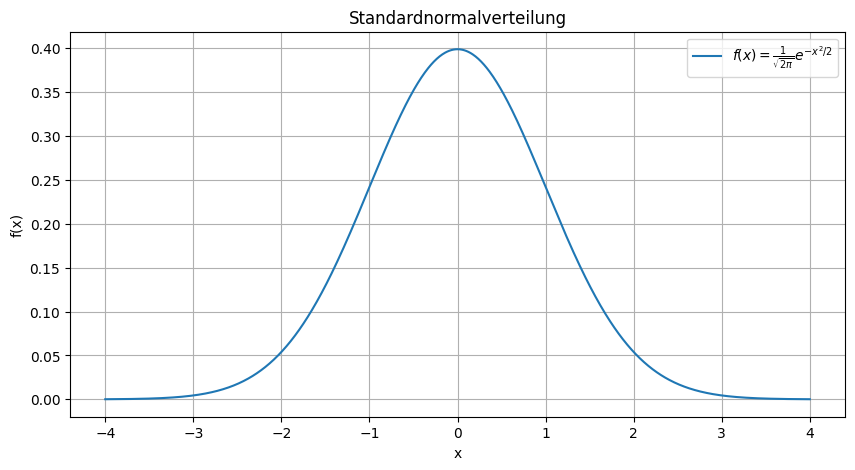

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Standardnormalverteilung
def f(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Intervall [-4, 4]
x = np.linspace(-4, 4, 1000)
y = f(x)

# Graph zeichnen
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='$f(x) = \\frac{1}{\\sqrt{2\\pi}} e^{-x^2/2}$')
plt.title('Standardnormalverteilung')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## Aufgabe 2
### b)

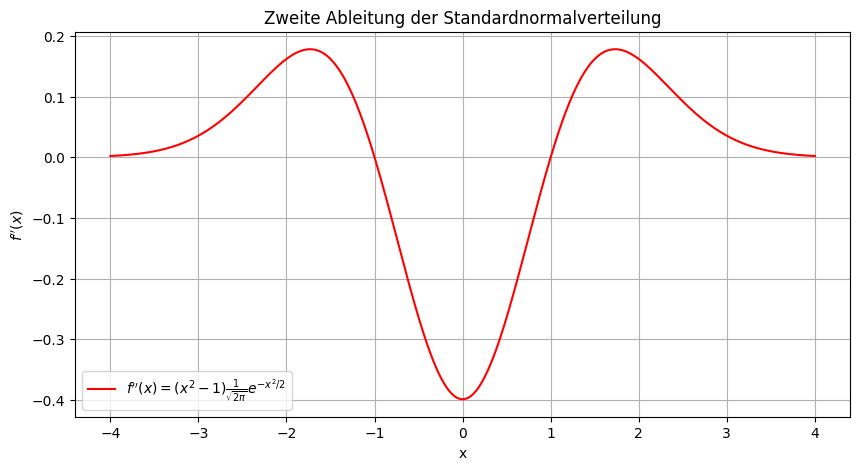

Nullstellen von f''(x): [-1.0, 1.0]


In [4]:
# Zweite Ableitung von f(x)
def f_double_prime(x):
    return (x**2 - 1) * f(x)

# Zweite Ableitung berechnen und plotten
y_double_prime = f_double_prime(x)

# Graph zeichnen
plt.figure(figsize=(10, 5))
plt.plot(x, y_double_prime, label="$f''(x) = (x^2 - 1) \\frac{1}{\\sqrt{2\\pi}} e^{-x^2/2}$", color='r')
plt.title('Zweite Ableitung der Standardnormalverteilung')
plt.xlabel('x')
plt.ylabel("$f''(x)$")
plt.legend()
plt.grid(True)
plt.show()

# Nullstellen der zweiten Ableitung finden
from scipy.optimize import newton

nullstellen = [newton(f_double_prime, -1), newton(f_double_prime, 1)]
print(f"Nullstellen von f''(x): {nullstellen}")

### Bedeutung der Nullstellen und Zusammenhang zu \( $\sigma$ \)

- **Bedeutung der Nullstellen**:
  - Die Nullstellen der zweiten Ableitung \( f''(x) \) sind die Wendepunkte der Funktion \( f(x) \).
  - Diese Nullstellen befinden sich bei $x = -1$  und $x = 1$.

- **Zusammenhang zu \( $\sigma$ \)**:
  - Bei der Standardnormalverteilung \( $\sigma = 1$ \) liegen die Wendepunkte genau eine Standardabweichung \( $\sigma$ \) vom Mittelwert \( $\mu = 0$ \) entfernt.
  - Die Nullstellen bei \( $x = \pm 1$ \) zeigen, dass die größte Krümmung (Änderung der Steigung) genau bei einer Standardabweichung vom Mittelwert entfernt auftritt.


## Aufgabe 2
### c)

/var/folders/gf/s3kbtztd6vgddf2v6308w8wh0000gn/T/ipykernel_31213/1106516281.py:6: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return simps(y, x)


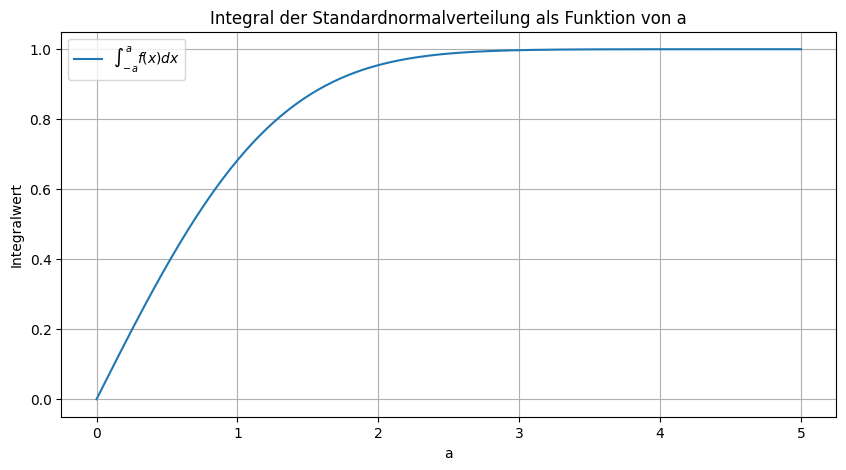

In [5]:
from scipy.integrate import simps

def sigma_integral(a, n):
    x = np.linspace(-a, a, n)
    y = f(x)
    return simps(y, x)

# Integral im Intervall [0, 5] plotten
a_values = np.linspace(0, 5, 500)
integrals = [sigma_integral(a, 1000) for a in a_values]

plt.figure(figsize=(10, 5))
plt.plot(a_values, integrals, label='$\int_{-a}^{a} f(x) dx$')
plt.title('Integral der Standardnormalverteilung als Funktion von a')
plt.xlabel('a')
plt.ylabel('Integralwert')
plt.legend()
plt.grid(True)
plt.show()

## Aufgabe 2
### d)

In [6]:
from scipy.optimize import brentq

def integral_target(a):
    return sigma_integral(a, 1000) - 0.9

a_0_9 = brentq(integral_target, 0, 5)
print(f"Wert von a für ein Integral von 0.9: {a_0_9}")

Wert von a für ein Integral von 0.9: 1.6448536269499368


/var/folders/gf/s3kbtztd6vgddf2v6308w8wh0000gn/T/ipykernel_31213/1106516281.py:6: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return simps(y, x)


## Aufgabe 3
### a)

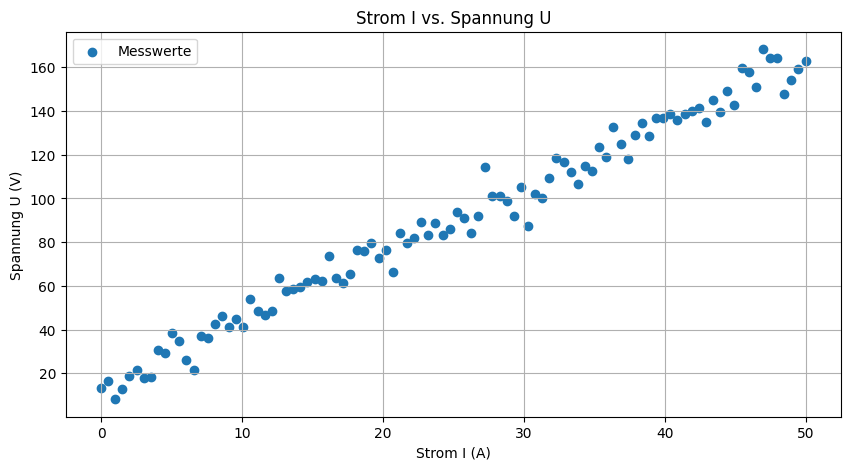

In [7]:
import matplotlib.pyplot as plt
from read import binary

# Dateipfad
file_path = 'messwerte.bin'

# Daten einlesen
I, U = binary(file_path)

# Scatter-Plot erstellen
plt.figure(figsize=(10, 5))
plt.scatter(I, U, label='Messwerte')
plt.title('Strom I vs. Spannung U')
plt.xlabel('Strom I (A)')
plt.ylabel('Spannung U (V)')
plt.legend()
plt.grid(True)
plt.show()

## Aufgabe 3
### b)

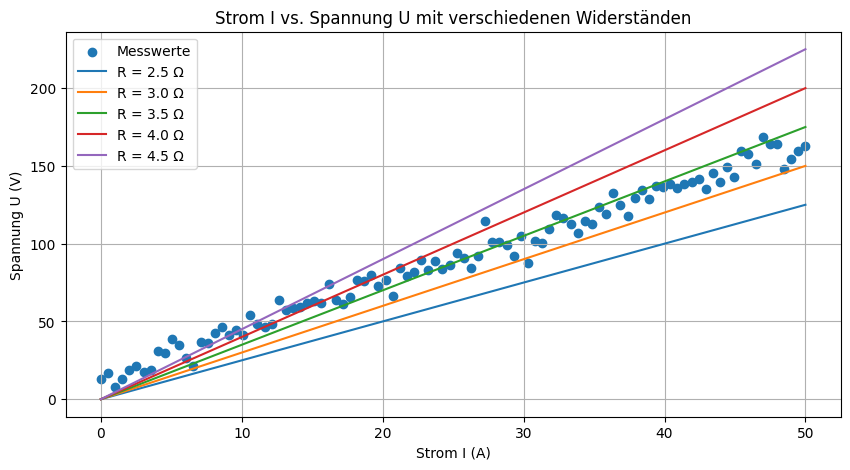

In [8]:
R_list = [2.5, 3.0, 3.5, 4.0, 4.5]

plt.figure(figsize=(10, 5))
plt.scatter(I, U, label='Messwerte')

for R in R_list:
    U_expected = np.array(I) * R
    plt.plot(I, U_expected, label=f'R = {R} Ω')

plt.title('Strom I vs. Spannung U mit verschiedenen Widerständen')
plt.xlabel('Strom I (A)')
plt.ylabel('Spannung U (V)')
plt.legend()
plt.grid(True)
plt.show()

## Aufgabe 3
### c)

In [9]:
def sum_sq_dev(R):
    U_expected = np.array(I) * R
    return np.sum((np.array(U) - U_expected)**2)

R_values = np.linspace(2.5, 4.5, 500)
sq_devs = [sum_sq_dev(R) for R in R_values]

R_min = R_values[np.argmin(sq_devs)]
print(f'R-Wert, der die summierte quadratische Abweichung minimiert: {R_min}')

R-Wert, der die summierte quadratische Abweichung minimiert: 3.429859719438878


## Aufgabe 3
### d)

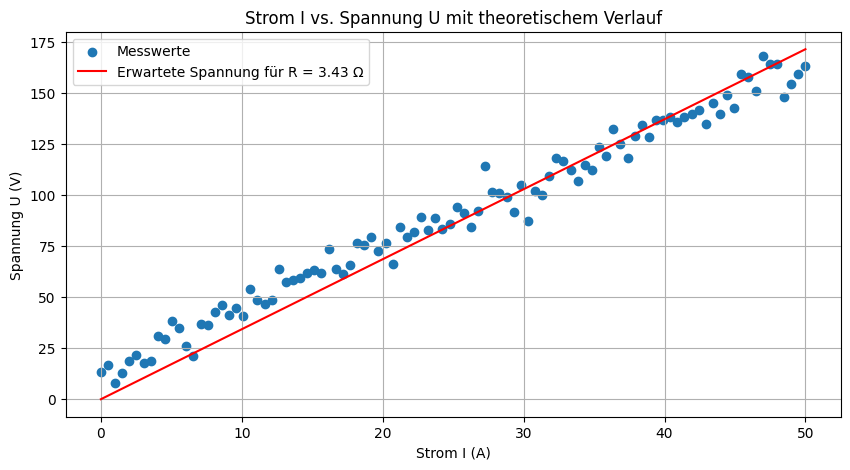

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(I, U, label='Messwerte')
U_theoretical = np.array(I) * R_min
plt.plot(I, U_theoretical, label=f'Erwartete Spannung für R = {R_min:.2f} Ω', color='r')

plt.title('Strom I vs. Spannung U mit theoretischem Verlauf')
plt.xlabel('Strom I (A)')
plt.ylabel('Spannung U (V)')
plt.legend()
plt.grid(True)
plt.show()

### Verbessertes Modell

Als Verbesserung des Modells könnte man noch eine **Residuenanalyse** durchführen. Durch die Residuenanalyse (Plot der Residuen) können systematische Fehler im Modell aufgedeckt werden. Idealerweise sollten die Residuen zufällig um die Null-Linie verteilt sein.

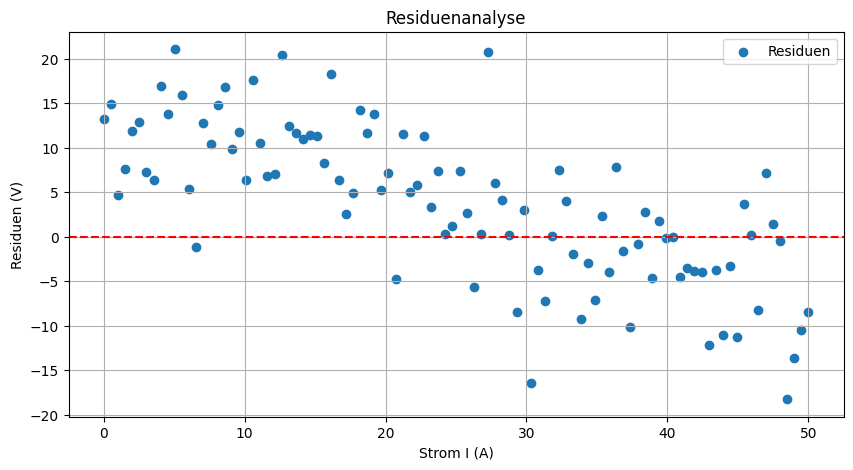

In [11]:


# Fehleranalyse durch Residuenplot
residuals = np.array(U) - U_theoretical
plt.figure(figsize=(10, 5))
plt.scatter(I, residuals, label='Residuen')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuenanalyse')
plt.xlabel('Strom I (A)')
plt.ylabel('Residuen (V)')
plt.legend()
plt.grid(True)
plt.show()